In [1]:
cd ..

/Users/nngo/rebuildingcode/rbc


In [2]:
import matplotlib.pyplot as plt

from rbc.point import Point
from shapely.geometry import Polygon

In [3]:
b1 = Point(0, 0, 0)
b2 = Point(0, 10, 0)
b3 = Point(10, 10, 0)
b4 = Point(10, 0, 0)

b_pts = [b1, b2, b3, b4]

b_xy = [(p.x, p.y) for p in b_pts]

boundary = Polygon(b_xy)

In [4]:
diff = b3.distance(b2)
diff

10.0

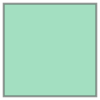

In [5]:
boundary

In [22]:
# boundary can be switched with FloorPlan

class Matter:
    def __init__(self, points, boundary, align_w_wall=True):
        self.boundary = boundary
        self.polygon = self.create_polygon(points)
        # place polygon in boundary
        
    def create_polygon(self, points):
        poly = Polygon(shell=[(pt.x, pt.y) for pt in points])
        
        # check if poly is smaller than boundary
        if self.boundary_larger_than(poly):
            offset = (self.boundary.centroid.x - poly.centroid.x, self.boundary.centroid.y - poly.centroid.y)

            points_at_boundary_centroid = []
            for pt in points:
                mod_pt = Point(pt.x + offset[0], pt.y + offset[1], pt.z)
                points_at_boundary_centroid.append(mod_pt)

            return Polygon(shell=[(pt.x, pt.y) for pt in points_at_boundary_centroid])
        else:
            raise ValueError
    
    def boundary_larger_than(self, poly):
        return poly.envelope.area < self.boundary.area
        
#     def check_boundary(self, boundary, align_w_wall):
#         poly_centroid = self.polygon.centroid
#         bound_centroid = boundary.centroid

    def plot(self, figsize=(12, 12)):
        """Plots a list of rooms"""
        polys = [self.boundary, self.polygon]
        labels = ["", "thing"]
        
        fig, ax = plt.subplots(figsize=figsize)
        for idx, poly in enumerate(polys):
            x, y = poly.exterior.xy
            ax.plot(x, y)
            ax.text(poly.centroid.x, poly.centroid.y, s=labels[idx],
                horizontalalignment='center', verticalalignment='center')
        plt.show()

In [23]:
t1 = Point(0, 0, 0)
t2 = Point(0, 5, 0)
# t3 = Point(5, 5, 0)
t4 = Point(5, 0, 0)

t_pts = [t1, t2, t4]

# t_xy = [(p.x, p.y) for p in t_pts]

thing = Matter(t_pts, boundary=boundary)

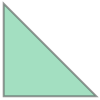

In [24]:
thing.polygon

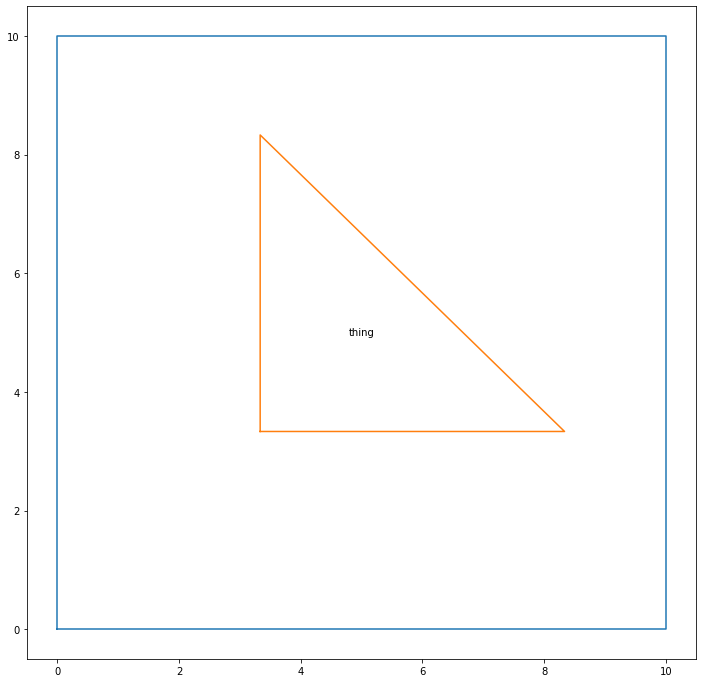

In [25]:
thing.plot()

In [10]:
thing.boundary_larger_than(thing.polygon)

True

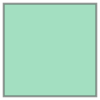

In [11]:
thing.polygon.envelope

In [12]:
from shapely.affinity import rotate

In [13]:
thing.polygon = rotate(thing.polygon, 30)

In [14]:
set(thing.polygon.exterior.coords)

{(2.418269823872237, 6.748396842794431),
 (4.918269823872237, 2.418269823872236),
 (9.24839684279443, 4.918269823872237)}

In [15]:
thing.polygon.length

17.071067811865476

In [16]:
dists = []
for idx, vert in enumerate(list(thing.polygon.exterior.coords)):

    if idx == 0:
        continue
    else:
        dists.append(Point(thing.polygon.exterior.coords[idx]).distance(
            Point(thing.polygon.exterior.coords[idx-1])
        ))
    

In [17]:
dists

[5.000000000000001, 7.0710678118654755, 5.0]

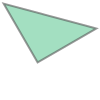

In [18]:
thing.polygon

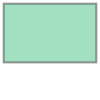

In [19]:
thing.polygon.envelope

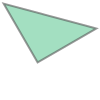

In [20]:
thing.polygon.convex_hull

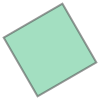

In [21]:
thing.polygon.minimum_rotated_rectangle